In [22]:
# Libraries import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [23]:
data = pd.read_csv('../data/model-cleaned-players22.csv')

data['value_eur'] = np.log(data['value_eur'])

In [24]:
y = data['value_eur']
x = data.drop(columns= 'value_eur')

x_train, x_test, y_train, y_test = train_test_split(
   x, y, test_size=0.2, random_state=0
)

x_train

,position,overall,potential,wage_eur,age,height_cm,weight_kg,club_contract_valid_until,preferred_foot,weak_foot,...,nationality_name_Uganda,nationality_name_Ukraine,nationality_name_United Arab Emirates,nationality_name_United States,nationality_name_Uruguay,nationality_name_Uzbekistan,nationality_name_Venezuela,nationality_name_Wales,nationality_name_Zambia,nationality_name_Zimbabwe
5118,0,69,72,5000.0,25,188,78,2023.0,1,3,...,0,0,0,0,0,0,0,0,0,0
13220,1,61,70,800.0,21,168,61,2022.0,1,3,...,0,0,0,0,0,0,0,0,0,0
10922,0,64,64,500.0,28,184,78,2021.0,1,2,...,0,0,0,0,0,0,0,0,0,0
13891,0,60,69,550.0,20,175,70,2022.0,0,2,...,0,0,0,0,0,0,0,0,0,0
13678,1,60,60,900.0,30,187,85,2023.0,1,3,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9225,1,65,68,9000.0,25,188,80,2022.0,1,3,...,0,0,0,0,0,0,0,0,0,0
13123,0,61,69,2000.0,22,180,75,2022.0,1,3,...,0,0,0,0,0,0,0,0,0,0
9845,1,65,80,2000.0,21,174,61,2022.0,1,2,...,0,0,0,0,0,0,0,0,0,0
10799,1,64,72,500.0,23,180,73,2021.0,1,3,...,0,0,0,0,0,0,0,0,0,0


In [25]:
lr = LinearRegression()
lr.fit(x_train, y_train)
 
c = lr.intercept_
c

5113018.971462181

In [26]:
m = lr.coef_
m

array([ 2.18734152e-02,  1.75015944e-01,  8.67438859e-03,  4.20612680e-06,
       -1.00627039e-01,  9.49162094e-04,  9.54482188e-04,  2.59944059e-03,
       -4.97473937e-03, -3.18120267e-03,  1.55945335e-02,  7.76301749e-02,
       -2.49344947e-03, -1.04775585e-03, -1.24377304e-03, -3.32196583e-03,
       -6.86882682e-03,  1.21000639e-02,  4.67452768e-03,  2.57203462e-04,
        1.26064915e-03, -8.60783042e-04,  1.87694892e-03,  9.58266224e-04,
        3.53571298e-03, -6.86047930e-04,  6.99163646e-04,  1.02352093e-04,
        1.28887810e-03,  1.56143355e-03,  2.09422744e-03, -1.65452915e-04,
        2.30752117e-03,  6.76086190e-04, -9.66497242e-05, -1.28430778e-04,
        1.02023871e-04, -2.44048275e-03, -4.69333591e-04, -9.42065402e-04,
       -2.51981229e-03,  5.54777281e-04,  9.00068067e-04, -5.71403948e-05,
       -2.39622579e-04, -3.69700185e-03, -3.35815567e-03, -1.95789183e-03,
        5.80233072e+06,  5.84341247e+06,  5.80233078e+06,  4.09261817e-02,
        5.80233080e+06,  

In [27]:
y_pred_train = lr.predict(x_train)
y_pred_train

array([14.46672033, 13.49412617, 13.05897152, ..., 14.24447982,
       13.7008502 , 15.69974366])

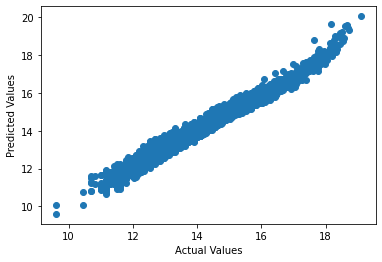

In [28]:
plt.scatter(y_train, y_pred_train)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

In [29]:
r2_score(y_train, y_pred_train)

0.9791731562338762

In [30]:
y_pred_test = lr.predict(x_test)
y_pred_test

array([13.08579952, 13.43731436, 14.77220089, ..., 12.74213806,
       12.8464033 , 13.23046865])

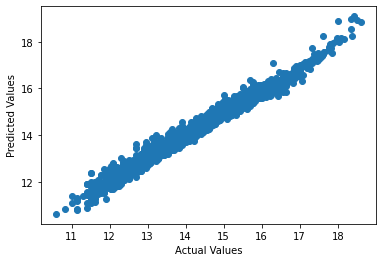

In [31]:
plt.scatter(y_test, y_pred_test)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

In [32]:
r2_score(y_test, y_pred_test)

0.9774333643395928

In [33]:
# Calculate the Root Mean Squared Error (RMSE)
mse = mean_squared_error(y_test, y_pred_test)
rmse = np.sqrt(mse)

print('rmse: ', rmse)

rmse:  0.179973557182203


In [34]:
cross_val_score_train = cross_val_score(lr, x_train, y_train, scoring='r2', cv=10)
r2_score_train = np.mean(cross_val_score_train)

print('r2_score_train: ', r2_score_train)

r2_score_train:  0.975877537244244


In [35]:
cross_val_score_test = cross_val_score(lr, x_test, y_test, scoring='r2', cv=10)

# All scores in the list falls within the range of 0.96 to 0.98 except 1 row with negative millions.
# I decided it's best to remove it because it completely skews the mean calculation.
lower_bound = 0
upper_bound = 1
outliers_removed_cross_val_score_test = [
   x for x in cross_val_score_test if lower_bound <= x <= upper_bound
]

r2_score_test = np.mean(outliers_removed_cross_val_score_test)

print('r2_score_test: ', r2_score_test)


r2_score_test:  0.9694991797362965


In [37]:
# Calculate the RMSE from the cross-validated predictions
y_pred = cross_val_predict(lr, x, y, cv=10)

# I noticed that all scores in the y_pred falls within the range of 9 and 20
# except for 2 rows with numbers in the tens of thousands. Because 2 is a very small number from
# over 17000 rows, I decided it's best to remove them because they completely skew the analysis.
lower_bound = 9
upper_bound = 21

# Use boolean indexing to filter out outliers from y_pred
outliers_removed_y_pred = y_pred[(y_pred >= lower_bound) & (y_pred <= upper_bound)]

# Use the same index to remove corresponding rows from y
outliers_removed_y = y[(y_pred >= lower_bound) & (y_pred <= upper_bound)]

cross_val_rmse = np.sqrt(mean_squared_error(outliers_removed_y, outliers_removed_y_pred))

print('Cross-Validated rmse: ', cross_val_rmse)

Cross-Validated rmse:  0.22576134484188204
